In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [64]:
df_s=pd.read_csv('/content/drive/MyDrive/wiley edge final project/seasons_00_19.csv')

In [65]:
df_s['home_win']= df_s['HOME_PTS'] > df_s['VISITOR_PTS'] 

In [66]:
team_abb = {
"ATLANTA HAWKS" : "ATL",
"ST. LOUIS HAWKS" : "SLH",
"MILWAUKEE HAWKS" : "MIL",
"TRI-CITIES BLACKHAWKS" : "TCB",
"BOSTON CELTICS" : "BOS",
"BROOKLYN NETS" : "BRK",
"NEW JERSEY NETS" : "NJN",
"CHICAGO BULLS" : "CHI",
"CHARLOTTE HORNETS": "CHH",
"CHARLOTTE BOBCATS" : "CHA",
"CLEVELAND CAVALIERS" : "CLE",
"DALLAS MAVERICKS" : "DAL",
"DENVER NUGGETS" : "DEN",
"DETROIT PISTONS" : "DET",
"FORT WAYNE PISTONS" : "FWP",
"GOLDEN STATE WARRIORS" : "GSW",
"SAN FRANCISCO WARRIORS" : "SFW",
"PHILADELPHIA WARRIORS" : "PHI",
"HOUSTON ROCKETS" : "HOU",
"INDIANA PACERS" : "IND",
"LOS ANGELES CLIPPERS" : "LAC",
"SAN DIEGO CLIPPERS" : "SDC",
"BUFFALO BRAVES" : "BUF",
"LOS ANGELES LAKERS" : "LAL",
"MINNEAPOLIS LAKERS" : "MIN",
"MEMPHIS GRIZZLIES" : "MEM",
"VANCOUVER GRIZZLIES" : "VAN",
"MIAMI HEAT" : "MIA",
"MILWAUKEE BUCKS" : "MIL",
"MINNESOTA TIMBERWOLVES" : "MIN",
"NEW ORLEANS PELICANS" : "NOP",
"NEW ORLEANS/OKLAHOMA CITY HORNETS" : "NOK",
"NEW ORLEANS HORNETS" : "NOH",
"NEW YORK KNICKS" : "NYK",
"OKLAHOMA CITY THUNDER" : "OKC",
"SEATTLE SUPERSONICS" : "SEA",
"ORLANDO MAGIC" : "ORL",
"PHILADELPHIA 76ERS" : "PHI",
"SYRACUSE NATIONALS" : "SYR",
"PHOENIX SUNS" : "PHO",
"PORTLAND TRAIL BLAZERS" : "POR",
"SACRAMENTO KINGS" : "SAC",
"KANSAS CITY KINGS" : "KCK",
"KANSAS CITY-OMAHA KINGS" : "KCK",
"CINCINNATI ROYALS" : "CIN",
"ROCHESTER ROYALS" : "ROR",
"SAN ANTONIO SPURS" : "SAS",
"TORONTO RAPTORS" : "TOR",
"UTAH JAZZ" : "UTA",
"NEW ORLEANS JAZZ" : "NOJ",
"WASHINGTON WIZARDS" : "WAS",
"WASHINGTON BULLETS" : "WAS",
"CAPITAL BULLETS" : "CAP",
"BALTIMORE BULLETS" : "BAL",
"CHICAGO ZEPHYRS" : "CHI",
"CHICAGO PACKERS" : "CHI",
"ANDERSON PACKERS" : "AND",
"CHICAGO STAGS" : "CHI",
"INDIANAPOLIS OLYMPIANS" : "IND",
"SHEBOYGAN RED SKINS" : "SRS",
"ST. LOUIS BOMBERS" : "SLB",
"WASHINGTON CAPITOLS" : "WAS",
"WATERLOO HAWKS" : "WAT",
"SAN DIEGO ROCKETS" : "SDR"
}

In [67]:
df_s['VISITOR']=df_s['VISITOR'].str.upper()
df_s['HOME']=df_s['HOME'].str.upper()
df_s.replace({"VISITOR": team_abb},inplace=True)
df_s.replace({"HOME": team_abb},inplace=True)
df_s['GAMEID']=df_s['DATE'].str.replace('-','')+df_s['HOME']+df_s['VISITOR']
df_s

,Unnamed: 0,DATE,VISITOR,VISITOR_PTS,HOME,HOME_PTS,home_win,GAMEID
0,0,1999-11-02,ORL,86,CHH,100,True,19991102CHHORL
1,1,1999-11-02,GSW,96,DAL,108,True,19991102DALGSW
2,2,1999-11-02,PHO,102,DEN,107,True,19991102DENPHO
3,3,1999-11-02,MIL,98,HOU,93,False,19991102HOUMIL
4,4,1999-11-02,SEA,104,LAC,92,False,19991102LACSEA
...,...,...,...,...,...,...,...,...
24149,1225,2019-04-10,CHI,109,PHI,125,True,20190410PHICHI
24150,1226,2019-04-10,DAL,94,SAS,105,True,20190410SASDAL
24151,1227,2019-04-10,MIN,95,DEN,99,True,20190410DENMIN
24152,1228,2019-04-10,UTA,137,LAC,143,True,20190410LACUTA


In [68]:
df_elo=pd.read_csv('/content/elo.csv')
df_s=df_s.merge(df_elo, how="left",on="GAMEID")
df_s

,Unnamed: 0_x,DATE,VISITOR,VISITOR_PTS,HOME,HOME_PTS,home_win,GAMEID,Unnamed: 0_y,HOME_ELO,AWAY_ELO
0,0,1999-11-02,ORL,86,CHH,100,True,19991102CHHORL,NaN,NaN,NaN
1,1,1999-11-02,GSW,96,DAL,108,True,19991102DALGSW,NaN,NaN,NaN
2,2,1999-11-02,PHO,102,DEN,107,True,19991102DENPHO,NaN,NaN,NaN
3,3,1999-11-02,MIL,98,HOU,93,False,19991102HOUMIL,NaN,NaN,NaN
4,4,1999-11-02,SEA,104,LAC,92,False,19991102LACSEA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24149,1225,2019-04-10,CHI,109,PHI,125,True,20190410PHICHI,10829.0,1570.0,1319.0
24150,1226,2019-04-10,DAL,94,SAS,105,True,20190410SASDAL,10830.0,1605.0,1394.0
24151,1227,2019-04-10,MIN,95,DEN,99,True,20190410DENMIN,10831.0,1621.0,1466.0
24152,1228,2019-04-10,UTA,137,LAC,143,True,20190410LACUTA,10832.0,1554.0,1621.0


In [69]:
df_p=pd.read_csv('/content/drive/MyDrive/wiley edge final project/players_00_19.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [70]:
df_new=df_p.merge(df_s, how="left",on="GAMEID")
df_1=df_new[['GAMEID','DATE','PLAYER','HOME','VISITOR','home_win','HOME_ELO', 'AWAY_ELO' ]]
df_2=df_1.dropna()
df_2

,GAMEID,DATE,PLAYER,HOME,VISITOR,home_win,HOME_ELO,AWAY_ELO
200980,20100101ATLNYK,2010-01-01,Josh Smith,ATL,NYK,False,1500.0,1500.0
200981,20100101ATLNYK,2010-01-01,Al Horford,ATL,NYK,False,1500.0,1500.0
200982,20100101ATLNYK,2010-01-01,Joe Johnson,ATL,NYK,False,1500.0,1500.0
200983,20100101ATLNYK,2010-01-01,Mike Bibby,ATL,NYK,False,1500.0,1500.0
200984,20100101ATLNYK,2010-01-01,Marvin Williams,ATL,NYK,False,1500.0,1500.0
...,...,...,...,...,...,...,...,...
386330,20190410PORSAC,2019-04-10,Harrison Barnes,POR,SAC,True,1646.0,1450.0
386331,20190410PORSAC,2019-04-10,Nemanja Bjelica,POR,SAC,True,1646.0,1450.0
386332,20190410PORSAC,2019-04-10,Marvin Bagley III,POR,SAC,True,1646.0,1450.0
386333,20190410PORSAC,2019-04-10,Yogi Ferrell,POR,SAC,True,1646.0,1450.0


## label encoding

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_2['PLAYER'])
df_2['PLAYER']=le.transform(df_2['PLAYER'])
le.fit(df_2['HOME'])
df_2['HOME_n']=le.transform(df_2['HOME'])
df_2['VISITOR_n']=le.transform(df_2['VISITOR'])
df_2["home_win"] = df_2["home_win"].astype(int)
df_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,GAMEID,DATE,PLAYER,HOME,VISITOR,home_win,HOME_ELO,AWAY_ELO,HOME_n,VISITOR_n
200980,20100101ATLNYK,2010-01-01,587,ATL,NYK,0,1500.0,1500.0,0,20
200981,20100101ATLNYK,2010-01-01,13,ATL,NYK,0,1500.0,1500.0,0,20
200982,20100101ATLNYK,2010-01-01,529,ATL,NYK,0,1500.0,1500.0,0,20
200983,20100101ATLNYK,2010-01-01,759,ATL,NYK,0,1500.0,1500.0,0,20
200984,20100101ATLNYK,2010-01-01,736,ATL,NYK,0,1500.0,1500.0,0,20
...,...,...,...,...,...,...,...,...,...,...
386330,20190410PORSAC,2019-04-10,397,POR,SAC,1,1646.0,1450.0,25,26
386331,20190410PORSAC,2019-04-10,792,POR,SAC,1,1646.0,1450.0,25,26
386332,20190410PORSAC,2019-04-10,735,POR,SAC,1,1646.0,1450.0,25,26
386333,20190410PORSAC,2019-04-10,1077,POR,SAC,1,1646.0,1450.0,25,26


In [72]:
df3=df_2[['GAMEID', 'PLAYER', 'home_win', 'HOME_ELO',
       'AWAY_ELO', 'HOME_n', 'VISITOR_n']]
df3=df3.reset_index(drop=True)    
df3

,GAMEID,PLAYER,home_win,HOME_ELO,AWAY_ELO,HOME_n,VISITOR_n
0,20100101ATLNYK,587,0,1500.0,1500.0,0,20
1,20100101ATLNYK,13,0,1500.0,1500.0,0,20
2,20100101ATLNYK,529,0,1500.0,1500.0,0,20
3,20100101ATLNYK,759,0,1500.0,1500.0,0,20
4,20100101ATLNYK,736,0,1500.0,1500.0,0,20
...,...,...,...,...,...,...,...
173311,20190410PORSAC,397,1,1646.0,1450.0,25,26
173312,20190410PORSAC,792,1,1646.0,1450.0,25,26
173313,20190410PORSAC,735,1,1646.0,1450.0,25,26
173314,20190410PORSAC,1077,1,1646.0,1450.0,25,26


## feature engineering 

In [101]:
y = df3['home_win']
X = df3.drop(['home_win','GAMEID'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)
X_train=X_train.join(X_train.groupby('PLAYER')['HOME_ELO'].sum(), on="PLAYER", rsuffix='_sum')
X_train=X_train.join(X_train.groupby('PLAYER')['HOME_ELO'].mean(), on="PLAYER", rsuffix='_mean')
X_test=X_test.join(X_train.groupby('PLAYER')['HOME_ELO'].sum(), on="PLAYER", how='left',rsuffix='_sum')
X_test=X_test.join(X_train.groupby('PLAYER')['HOME_ELO'].mean(), on="PLAYER", how='left', rsuffix='_mean')
X_test.fillna(0,inplace=True)

# modeling

LOG REG

In [102]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.6624451880913916


KNN MODEL

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6412704823447958
Precision: 0.6796256299496041
Recall: 0.739703217591459


In [ ]:
# from sklearn.model_selection import GridSearchCV

# #List Hyperparameters that we want to tune.
# leaf_size = list(range(1))
# n_neighbors = list(range(1,100))
# p=[1]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=10)
# #Fit the model
# best_model = clf.fit(X_train, y_train)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import roc_auc_score

# knn = KNeighborsClassifier(n_neighbors = best_model.best_estimator_.get_params()['n_neighbors'],
#                            p = best_model.best_estimator_.get_params()['p'],
#                            leaf_size = best_model.best_estimator_.get_params()['leaf_size'])
# knn.fit(X_train, y_train)
# #Predict test data set.
# y_pred = knn.predict(X_test)
# #Checking performance our model with classification report.
# print(classification_report(y_test, y_pred))

# roc_auc_score(y_test, y_pred)

DECISION TREE MODEL

In [104]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.9999711516270482
Precision: 1.0
Recall: 0.9999510260051913


In [105]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf = clf.fit(X_train,y_train) 

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.669166858989153
Precision: 0.6708793096865335
Recall: 0.8605220627846614


In [106]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

clf = clf.fit(X_train,y_train) 

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6759462266328179
Precision: 0.710148243045388
Recall: 0.7601253734267104


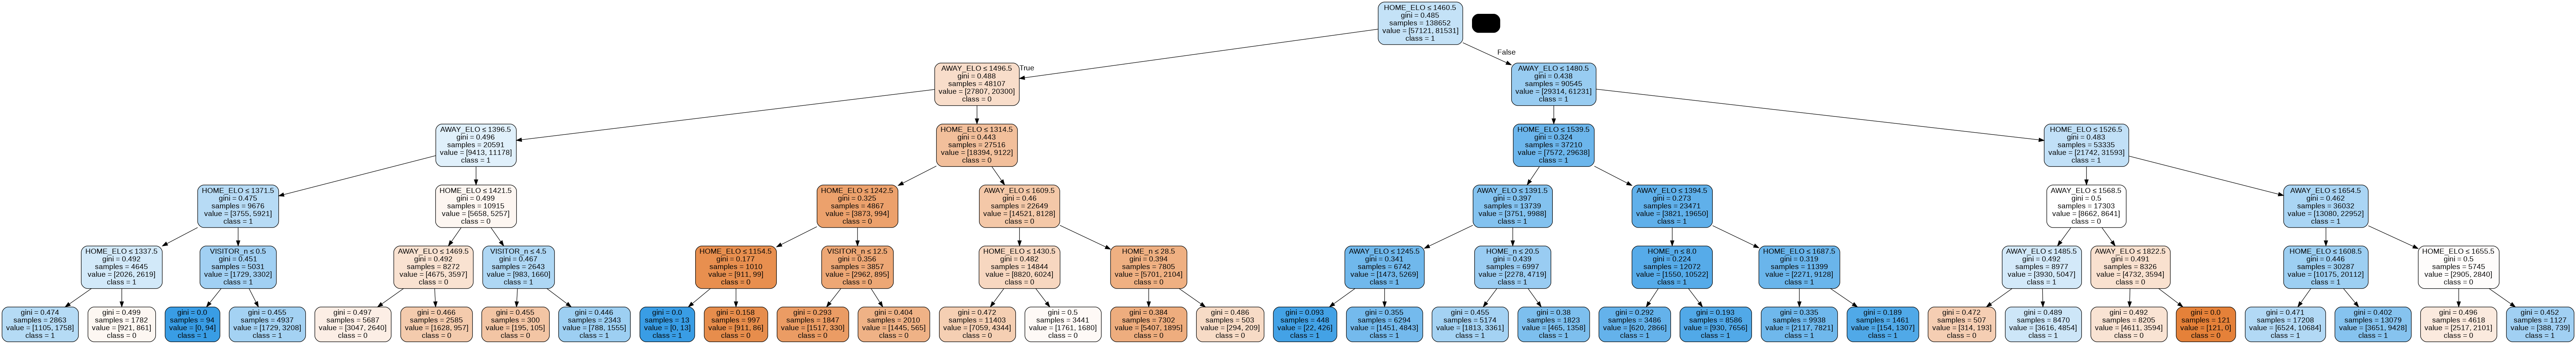

In [59]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

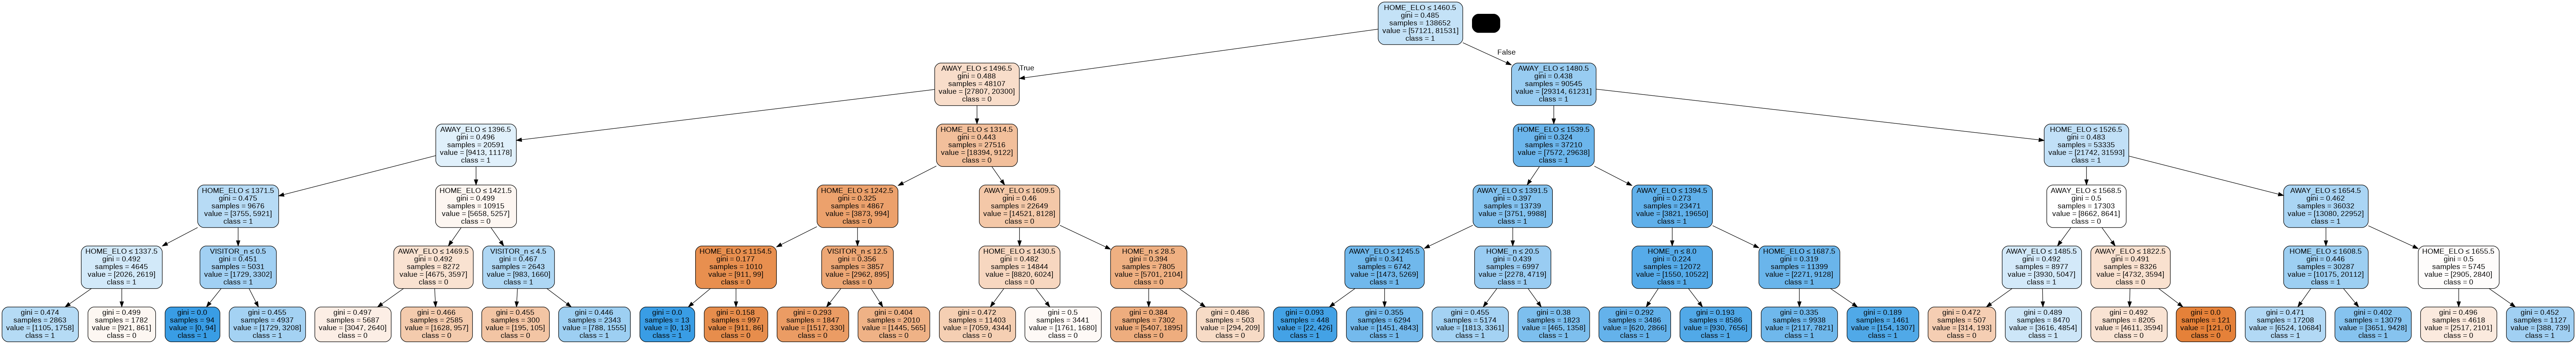

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

RANDOM FOREST

In [107]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 

clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.9934514193399492
Precision: 0.9917202415741282
Recall: 0.9972084822959009


In [ ]:
# clf = RandomForestClassifier(n_estimators = 200) 

# clf.fit(X_train, y_train)
 
# y_pred = clf.predict(X_test)

# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.9872778675282714
Precision: 0.984150833656456
Recall: 0.9944169645918017


In [ ]:
# clf = RandomForestClassifier(n_estimators = 50) 

# clf.fit(X_train, y_train)
 
# y_pred = clf.predict(X_test)

# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.9863258712208631
Precision: 0.9848315426126696
Recall: 0.9920662128409814


In [ ]:
# clf = RandomForestClassifier(n_estimators = 500) 

# clf.fit(X_train, y_train)
 
# y_pred = clf.predict(X_test)

# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

SVM

In [ ]:
# from sklearn import svm

# clf = svm.SVC(kernel='linear')

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
# from sklearn import svm

# clf = svm.SVC(kernel='poly')

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
# from sklearn import svm

# clf = svm.SVC(kernel='rbf')

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
# from sklearn import svm

# clf = svm.SVC(kernel='sigmoid')

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

VOTING CLASSIFIER

In [ ]:
# from sklearn import svm

# SVC_model = svm.SVC()

# KNN_model = KNeighborsClassifier(n_neighbors=5)
# SVC_model.fit(X_train, y_train)
# KNN_model.fit(X_train, y_train)

# SVC_prediction = SVC_model.predict(X_test)
# KNN_prediction = KNN_model.predict(X_test)

# print(accuracy_score(SVC_prediction, y_test))
# print(accuracy_score(KNN_prediction, y_test))

# print(confusion_matrix(SVC_prediction, y_test))
# print(classification_report(KNN_prediction, y_test))

MLP CLASSIFIER

In [110]:
# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(hidden_layer_sizes=(300,300,50), activation='relu', solver='adam', max_iter=500)
# mlp.fit(X_train,y_train)

# predict_train = mlp.predict(X_train)
# predict_test = mlp.predict(X_test)

In [111]:
# from sklearn.metrics import classification_report,confusion_matrix

# print(accuracy_score(y_test,predict_test))
